# Oracle Dataset Exploration

This notebook explores the Oracle dataset stored in an Excel file located at:
```
/Users/tayebekavousi/Desktop/github_sa/datasets/binary/oracle.xlsx
```

We will:
1. Display the first 10 rows of the dataset.
2. Sample 3 rows per class (based on the `is_toxic` label).
3. Visualize the distribution of classes.
4. Analyze text lengths (word count) and display summary statistics with a histogram.
5. Generate a word cloud for each class.
6. Prepare a PyTorch `Dataset` and `DataLoader` for fine-tuning.


## 1. Importing Required Libraries

We import the necessary libraries: `pandas`, `numpy`, `matplotlib`, `wordcloud`, and `torch`.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import torch
from torch.utils.data import Dataset, DataLoader

# Enable inline plotting
%matplotlib inline

## 2. Loading the Oracle Dataset from Excel

Here we load the dataset. Since the file does not include header rows, we specify `header=None` and assign custom column names: `message` and `is_toxic`.

In [25]:
file_path = "/Users/tayebekavousi/Desktop/github_sa/datasets/binary/oracle.xlsx"  # Path to the Oracle dataset

try:
    # Read the Excel file without headers and assign column names
    df = pd.read_excel(file_path, header=None, names=["message", "is_toxic"])
    print("Oracle dataset loaded successfully!")
except Exception as e:
    print("Error loading dataset:", e)

print("Dataset shape:", df.shape)

Oracle dataset loaded successfully!
Dataset shape: (1600, 2)


## 3. Display the First 10 Rows

We print the first 10 rows to get an initial overview of the dataset.

In [27]:
print("Head of the Oracle dataset (10 rows):")
display(df.head(10))

Head of the Oracle dataset (10 rows):


,message,is_toxic
0,This should read:\n\nThis survey tests the loc...,0
1,- Should be like below:\ntextDirection = SWT.A...,0
2,"""""""create a vdsm.config.config clone, modified...",0
3,"""Add test(s) performing the static code analys...",0
4,"""apt-get"" is distro specific... perhaps make i...",0
5,"""easy"" is marketing; let the code speak for it...",0
6,"""system-provided version"" or ""version provided...",0
7,"""that all 4 projects are imported"" or ""that it...",0
8,"""throws"" should be indented an additional 4 sp...",0
9,"""Toolkit"" usually stands for ""development tool...",0


## 4. Sampling 3 Rows from Each Class

We sample 3 rows per class (based on the `is_toxic` label) to inspect representative entries.

In [46]:
if 'is_toxic' in df.columns:
    try:
        sample_df = df.groupby('is_toxic').apply(lambda x: x.sample(n=10, random_state=42)).reset_index(drop=True)
        print("Sample (10 rows per class):")
        display(sample_df)
    except ValueError as e:
        print("Sampling error:", e)
else:
    print("Column 'is_toxic' not found in the dataset.")

Sample (10 rows per class):


/var/folders/xc/qkmv0r456dn4gsy6rfgnpns80000gn/T/ipykernel_61055/1623515017.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample_df = df.groupby('is_toxic').apply(lambda x: x.sample(n=10, random_state=42)).reset_index(drop=True)


,message,is_toxic,word_count
0,"No it doesn't ""explode"", I am not changing a s...",-1,38
1,You probably meant that the comments should ex...,-1,17
2,"Blah, I'm not saying to have XXHDPI passed in,...",-1,54
3,"no, I'd like to keep the API of this class clo...",-1,13
4,I believe Greg thinks there may be a performan...,-1,49
5,Hmm notification sounds like a QObject::signal...,-1,21
6,Why is 1 the default? Why isn't the default to...,-1,27
7,"I did not get your point, please fix it as you...",-1,13
8,now the test doesn't install SG at all. it wil...,-1,22
9,"I have no idea what this means, but this is pr...",-1,17


## 5. Distribution Analysis of Classes

We visualize the distribution of the `is_toxic` labels using a bar chart.

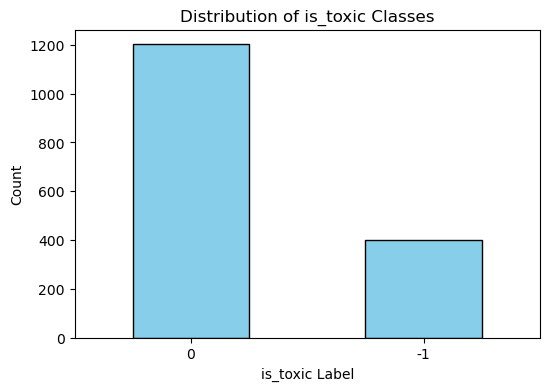

In [31]:
if 'is_toxic' in df.columns:
    class_counts = df['is_toxic'].value_counts()
    
    plt.figure(figsize=(6, 4))
    class_counts.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title("Distribution of is_toxic Classes")
    plt.xlabel("is_toxic Label")
    plt.ylabel("Count")
    plt.xticks(rotation=0)
    plt.show()
else:
    print("Column 'is_toxic' not found in the dataset.")

## 6. Text Length (Word) Analysis

We compute the word count for each message, print summary statistics (average, median, maximum, minimum), and display a histogram of word counts.

Text Length Analysis (in words):
Average Length: 28.98
Median Length: 20.0
Maximum Length: 250
Minimum Length: 1


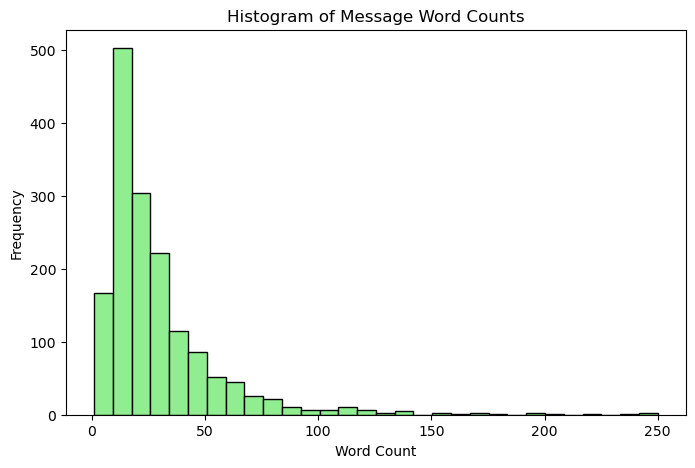

In [33]:
if 'message' in df.columns:
    df['word_count'] = df['message'].astype(str).apply(lambda x: len(x.split()))
    
    avg_length = df['word_count'].mean()
    median_length = df['word_count'].median()
    max_length = df['word_count'].max()
    min_length = df['word_count'].min()
    
    print("Text Length Analysis (in words):")
    print(f"Average Length: {avg_length:.2f}")
    print(f"Median Length: {median_length}")
    print(f"Maximum Length: {max_length}")
    print(f"Minimum Length: {min_length}")
    
    plt.figure(figsize=(8, 5))
    plt.hist(df['word_count'], bins=30, color='lightgreen', edgecolor='black')
    plt.title("Histogram of Message Word Counts")
    plt.xlabel("Word Count")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("Column 'message' not found in the dataset.")

## 7. Word Cloud for Each Class

We generate a word cloud for each `is_toxic` class to visualize the word distribution separately.

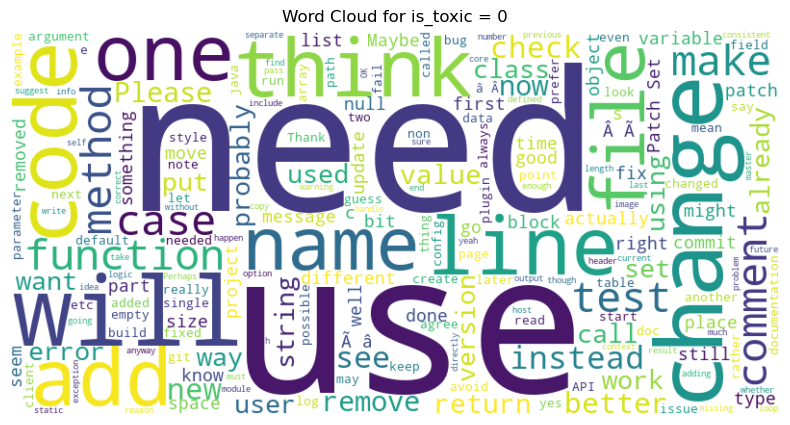

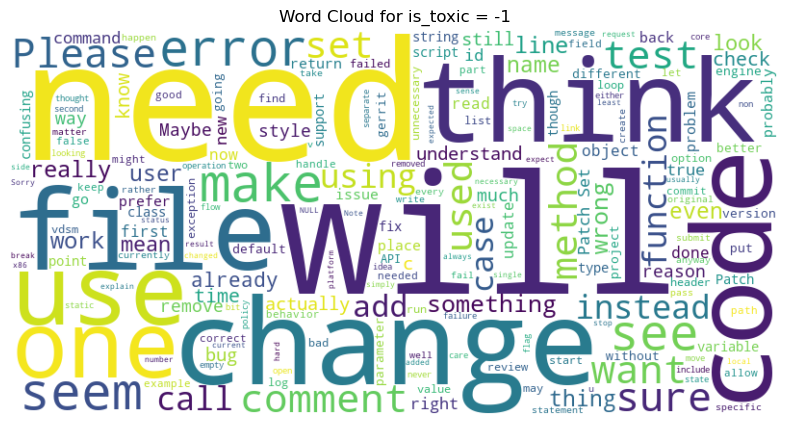

In [35]:
if 'message' in df.columns and 'is_toxic' in df.columns:
    for class_value in df['is_toxic'].unique():
        subset_df = df[df['is_toxic'] == class_value]
        text_combined = " ".join(subset_df['message'].dropna().astype(str).tolist())
        
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)
        
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f"Word Cloud for is_toxic = {class_value}")
        plt.axis("off")
        plt.show()
else:
    print("Either 'message' or 'is_toxic' column not found in the dataset.")